## Payer Analytics Assignment
### Problem Statement 
Business Problem Overview
A care management organisation called WeCare wants to identify among its diabetic patients, the ones that are at high risk of getting re-admitted to the hospital. They wish to intervene by providing some incentive to these patients that will help them improve their health. As the star analyst of this organisation, your job is to identify high-risk diabetic patients through risk stratification. This will help the payer to decide what are the right intervention programs for these patients.

### SETP 1 - Importing data and Inspecting

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

#display column and rows customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 300)

import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [11]:
# Reading csv File 

df = pd.read_csv(r"E:\DataScience\HealthCare\Assignment\diabetic_data.csv")

In [12]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [13]:
df.shape 

(101766, 50)

There are  101766 rows and 50 columns in the data frame.

In [14]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

Out of 50 columns 
1. 37 object
2. 13 int type


### STEP 2 - Data Cleaning and Preparation

In [16]:
# printing columns with missing values 

df.replace(to_replace = '?', value = np.nan, inplace = True) 

In [17]:
# readmitted is categorical variable 
# NO is assigned to 0 and all other records are assign 1

df['readmitted'].replace({'NO':0, '>30':1, '<30':1}, inplace=True)

In [18]:
# considering feature gender

# get unique values of gender
df['gender'].unique()

# get index of column with gender = 'Unknown/Invalid'
# drop rows with gender value 'Unknown/Invalid'
indexName = df[df['gender'] == 'Unknown/Invalid'].index

df.drop(indexName , inplace = True)

# check unique values for gender
df['gender'].unique()

# as there are only two values for gender we will replace them woth binary value 0/1
df['gender'] = df['gender'].map(dict(Male=1, Female=0))

In [19]:
# considering feture encounter_id 

# get the unique values for encounter_id
df['encounter_id'].nunique()

# all the row have unique values for this feature therefor we cant use this for model buliding.
# drop columns encounter_id
df.drop(['encounter_id'],axis = 1,inplace = True)

In [20]:
df['patient_nbr'].unique()
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,0,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,55629189,Caucasian,0,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
2,86047875,AfricanAmerican,0,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,82442376,Caucasian,1,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,42519267,Caucasian,1,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


In [21]:
# Hence the Patient Number columns has no Null Values
df['patient_nbr'].isnull().sum()

0

In [22]:
# consider feature race and find all unique values for race 

df['race'].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [23]:
# get null values for race feature

df['race'].isnull().sum()

2271

In [24]:
# replace nan by Other
df['race'].replace(np.nan,'Other',inplace=True)

In [25]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3776
Hispanic            2037
Asian                641
Name: race, dtype: int64

In [26]:
# the categorical data is gonna be difficult to analysis we will be replcing them with numberical one 
# least occuring will be 1 and so on so forth

df['race'].replace({'Asian':1, 'Hispanic':2, 'Other':3, 'AfricanAmerican':4, 'Caucasian':5}, inplace = True)
df['race'].value_counts()

5    76099
4    19210
3     3776
2     2037
1      641
Name: race, dtype: int64

In [27]:
# check percentage of missing values on columns more than 50

col = ((df.isnull().sum()/len(df)) * 100)
print(col[col.values > 40])

weight               96.858387
medical_specialty    49.081690
dtype: float64


In [28]:
# find columns with unique values in each row or same values in each row

uniCols = df.nunique()
print(uniCols[uniCols.values == 1])
print(uniCols[uniCols.values == 99999])

examide        1
citoglipton    1
dtype: int64
Series([], dtype: int64)


In [29]:
#Dropping Columns which have same values throughout as they wont be helpful in the predictions.Also dropping columns which has
#more than 90 percent null values which is weight

df.drop(['examide','citoglipton','weight','medical_specialty'],axis = 1, inplace = True)

In [30]:
df.shape

(101763, 45)

In [31]:
df.nunique()

patient_nbr                 71515
race                            5
gender                          2
age                            10
admission_type_id               8
discharge_disposition_id       26
admission_source_id            17
time_in_hospital               14
payer_code                     17
num_lab_procedures            118
num_procedures                  7
num_medications                75
number_outpatient              39
number_emergency               33
number_inpatient               21
diag_1                        716
diag_2                        748
diag_3                        789
number_diagnoses               16
max_glu_serum                   4
A1Cresult                       4
metformin                       4
repaglinide                     4
nateglinide                     4
chlorpropamide                  4
glimepiride                     4
acetohexamide                   2
glipizide                       4
glyburide                       4
tolbutamide   

In [32]:
# SO following are the columns which are having 2 unique values which can be mapped to 1 or 0 respectively
#acetohexamide, tolbutamide,troglitazone, glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,
#metformin-rosiglitazone,metformin-pioglitazone, change, diabetesMed

df['acetohexamide'] = df['acetohexamide'].map(dict(Steady=1, No=0))
df['tolbutamide'] = df['tolbutamide'].map(dict(Steady=1, No=0))
df['troglitazone'] = df['troglitazone'].map(dict(Steady=1, No=0))
df['glipizide-metformin'] = df['glipizide-metformin'].map(dict(Steady=1, No=0))
df['glimepiride-pioglitazone'] = df['glimepiride-pioglitazone'].map(dict(Steady=1, No=0))
df['metformin-rosiglitazone'] = df['metformin-rosiglitazone'].map(dict(Steady=1, No=0))
df['metformin-pioglitazone'] = df['metformin-pioglitazone'].map(dict(Steady=1, No=0))
df['change'] = df['change'].map(dict(Ch=1, No=0))
df['diabetesMed'] = df['diabetesMed'].map(dict(Yes=1, No=0))


In [33]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,5,0,[0-10),6,25,1,1,NaN,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,0,No,No,0,No,No,No,No,0,No,No,No,0,0,0,0,0,0,0
1,55629189,5,0,[10-20),1,1,7,3,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,0,No,No,0,No,No,No,No,0,No,Up,No,0,0,0,0,1,1,1
2,86047875,4,0,[20-30),1,1,7,2,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,0,Steady,No,0,No,No,No,No,0,No,No,No,0,0,0,0,0,1,0
3,82442376,5,1,[30-40),1,1,7,2,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,0,No,No,0,No,No,No,No,0,No,Up,No,0,0,0,0,1,1,0
4,42519267,5,1,[40-50),1,1,7,1,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,0,Steady,No,0,No,No,No,No,0,No,Steady,No,0,0,0,0,1,1,0


In [34]:
# get all the unique values for age
df['age'].unique()

# replace by mean of each value and convert age into numberical value
df['age'].replace({'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55,
       '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95},inplace=True)
df['age'].unique()

array([ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95], dtype=int64)

In [35]:
df['age'].isnull().sum()

0

In [36]:
# get all unique values for admission type 

df['admission_type_id'].unique()

# 1. emergency 
# 2. urgent
# 3. elective
# 4. newborn
# 5. trauma
# 9. information not available

# this coulmn has no null values and all data is proper format

array([6, 1, 2, 3, 4, 5, 8, 7], dtype=int64)

In [37]:
# get all the unique values for discharge disposition 

df['discharge_disposition_id'].unique()

#  1     Discharge to Home or Self Care (Routine Discharge) 
#  2     Discharged/Transferred to a Short Term General Hospital for Inpatient Care 
#  3     Discharged/Transferred to a Skilled Nursing Facility (SNF) with Medicare Certification in Anticipation of Skilled Care
#  4     Discharged/Transferred to an Intermediate Care Facility (ICF
#  5     Discharged/Transferred to Another Type of Health Care Institution Not Defined Elsewhere in This Code List
#  6     Discharged/Transferred to Home Under Care of Organized Home Health Service Organization in Anticipation of Covered Skilled Care 
#  7     Left Against Medical Advice or Discontinued Care
#  8     Reserved for National Assignment
#  9     Admitted as an Inpatient to this Hospital 
#  10-19 Reserved for National Assignment 
#  20    Expired
#  21-29 Reserved for National Assignment

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [38]:
# patient with discharge_disposition_id 20 indicated the patient is expired 
# we can safely delete such records

i = df[df['discharge_disposition_id'] == 20].index
df.drop(i,inplace=True)

In [39]:
# check percentage of missing values on columns more than 0

col = ((df.isnull().sum()/len(df)) * 100)
print(col[col.values > 0])

payer_code    39.557394
diag_1         0.020637
diag_2         0.351805
diag_3         1.398375
dtype: float64


In [40]:
df['payer_code'].unique()


array([nan, 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [41]:
df['payer_code'].value_counts()

MC    32438
HM     6274
SP     5007
BC     4655
MD     3532
CP     2531
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [42]:
# replace nan by Self Payable Value (Null Value Imputation)
df['payer_code'].replace({np.nan:'SP'},inplace=True)

In [43]:
df['payer_code'].replace({
'SP' : 17,'MC' : 16,'HM' : 15,'BC' : 14, 'MD' : 13,'CP' : 12,'UN' : 11, 'CM' : 10,  'OG' : 9, 
'PO' : 8, 'DM' : 7,  'CH' : 6,  'WC' : 5,  'OT' : 4,  'MP' : 3,  'SI' : 2,  'FR' : 1}, inplace = True)

In [44]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,5,0,5,6,25,1,1,17,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,0,No,No,0,No,No,No,No,0,No,No,No,0,0,0,0,0,0,0
1,55629189,5,0,15,1,1,7,3,17,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,0,No,No,0,No,No,No,No,0,No,Up,No,0,0,0,0,1,1,1
2,86047875,4,0,25,1,1,7,2,17,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,0,Steady,No,0,No,No,No,No,0,No,No,No,0,0,0,0,0,1,0
3,82442376,5,1,35,1,1,7,2,17,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,0,No,No,0,No,No,No,No,0,No,Up,No,0,0,0,0,1,1,0
4,42519267,5,1,45,1,1,7,1,17,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,0,Steady,No,0,No,No,No,No,0,No,Steady,No,0,0,0,0,1,1,0


In [45]:
df['diag_1'].replace({np.nan:'0'}, inplace = True)
df['diag_2'].replace({np.nan:'0'}, inplace = True)
df['diag_3'].replace({np.nan:'0'}, inplace = True)

In [46]:
def myfunc(x,y,z):
    if re.search('250+',x) or re.search('250+',y) or re.search('250+',z):
        return 1
    else:
        return 0
    
df['Diab'] = df.apply(lambda x: myfunc(x.diag_1, x.diag_2, x.diag_3), axis=1)

In [47]:
def myfunc2(x):
    if re.search('V+',x) or re.search('M+',x) or re.search('E+', x):
        return 2
    else:
        return x
    
df['diag_1'] = df.apply(lambda x: myfunc2(x.diag_1), axis=1)
df['diag_2'] = df.apply(lambda x: myfunc2(x.diag_2), axis=1)
df['diag_3'] = df.apply(lambda x: myfunc2(x.diag_3), axis=1)

In [48]:
df["diag_1"] = pd.to_numeric(df["diag_1"])
df["diag_2"] = pd.to_numeric(df["diag_2"])
df["diag_3"] = pd.to_numeric(df["diag_3"])

In [49]:
def myfunc3(x,y,z):
    if(x >= 390 and x <= 459) or (y >= 390 and y <= 459) or (z >= 390 and z <= 459) :
        return 1
    else:
        return 0
    
df['circulatory_disease'] = df.apply(lambda x: myfunc3(x.diag_1,x.diag_2,x.diag_3), axis = 1)    

In [50]:
def myfunc4(x,y):
    if(x == 0 and y == 0):
        return 0
    elif(x == 1 and y == 0):
        return 1
    elif(x == 0 and y == 1):
        return 2
    elif(x == 1 and y == 1):
        return 3
    else:
        return 4

df['Comorbidity'] = df.apply(lambda x: myfunc4(x.Diab,x.circulatory_disease), axis = 1)    

In [51]:
df['Comorbidity'].unique()

array([1, 3, 2, 0], dtype=int64)

In [52]:
# drop columns as our feature engg part is done are we are done deriving comorbidity feature

df.drop(['diag_1','diag_2','diag_3','Diab','circulatory_disease'], axis =1, inplace=True)

In [53]:
def funCheckIfTestTaken(x):
    if re.search('None',x):
        return 0
    else:
        return 1

df['isA1CTestTaken'] = df.apply(lambda x: funCheckIfTestTaken(x.A1Cresult), axis=1)
df['ismax_glu_serumTaken'] = df.apply(lambda x: funCheckIfTestTaken(x.max_glu_serum), axis=1)

In [54]:
def funCheckIfResultsNormal(x):
    if re.search('None',x) or re.search('Norm',x):
        return 1
    else:
        return 0

df['isA1CTestResultNorm'] = df.apply(lambda x: funCheckIfResultsNormal(x.A1Cresult), axis=1)
df['ismax_glu_serumResultNorm'] = df.apply(lambda x: funCheckIfResultsNormal(x.max_glu_serum), axis=1)

In [55]:
# features are derieved from this columns so we can safely delete them 
df.drop(['A1Cresult', 'max_glu_serum'], axis = 1, inplace = True)

In [56]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride'
                                ,'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol'
                                ,'tolazamide', 'insulin', 'glyburide-metformin']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [57]:
# dropping duplicate variables 
df.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride'
        ,'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol'
        ,'tolazamide', 'insulin', 'glyburide-metformin'], axis=1, inplace = True)

In [58]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,acetohexamide,tolbutamide,troglitazone,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Comorbidity,isA1CTestTaken,ismax_glu_serumTaken,isA1CTestResultNorm,ismax_glu_serumResultNorm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up
0,8222157,5,0,5,6,25,1,1,17,41,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
1,55629189,5,0,15,1,1,7,3,17,59,0,18,0,0,0,9,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
2,86047875,4,0,25,1,1,7,2,17,11,5,13,2,0,1,6,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
3,82442376,5,1,35,1,1,7,2,17,44,1,16,0,0,0,7,0,0,0,0,0,0,0,1,1,0,3,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
4,42519267,5,1,45,1,1,7,1,17,51,0,8,0,0,0,5,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101761 entries, 0 to 101765
Data columns (total 72 columns):
patient_nbr                   101761 non-null int64
race                          101761 non-null int64
gender                        101761 non-null int64
age                           101761 non-null int64
admission_type_id             101761 non-null int64
discharge_disposition_id      101761 non-null int64
admission_source_id           101761 non-null int64
time_in_hospital              101761 non-null int64
payer_code                    101761 non-null int64
num_lab_procedures            101761 non-null int64
num_procedures                101761 non-null int64
num_medications               101761 non-null int64
number_outpatient             101761 non-null int64
number_emergency              101761 non-null int64
number_inpatient              101761 non-null int64
number_diagnoses              101761 non-null int64
acetohexamide                 101761 non-null int64
tolbu

Now you can see that you have all variables as numeric.

#### Checking for Missing Values and Inputing Them

In [60]:
# Adding up the missing values (column-wise)
df.isnull().sum()

patient_nbr                   0
race                          0
gender                        0
age                           0
admission_type_id             0
discharge_disposition_id      0
admission_source_id           0
time_in_hospital              0
payer_code                    0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
number_diagnoses              0
acetohexamide                 0
tolbutamide                   0
troglitazone                  0
glipizide-metformin           0
glimepiride-pioglitazone      0
metformin-rosiglitazone       0
metformin-pioglitazone        0
change                        0
diabetesMed                   0
readmitted                    0
Comorbidity                   0
isA1CTestTaken                0
ismax_glu_serumTaken          0
isA1CTestResultNorm           0
ismax_glu_serumResultNorm     0
metformi

In [61]:
# there are no coluns with missing values 

In [62]:
# this indicated there are no duplicated rows therefore we can move ahead with analysis
df[df.duplicated()]

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,acetohexamide,tolbutamide,troglitazone,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Comorbidity,isA1CTestTaken,ismax_glu_serumTaken,isA1CTestResultNorm,ismax_glu_serumResultNorm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up


In [63]:
print("Readmitted percentage : {}%"
      .format(round(len(df[df.readmitted == 1])/df.shape[0] * 100,2)))

Readmitted percentage : 46.09%


In [64]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,acetohexamide,tolbutamide,troglitazone,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Comorbidity,isA1CTestTaken,ismax_glu_serumTaken,isA1CTestResultNorm,ismax_glu_serumResultNorm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up
0,8222157,5,0,5,6,25,1,1,17,41,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
1,55629189,5,0,15,1,1,7,3,17,59,0,18,0,0,0,9,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
2,86047875,4,0,25,1,1,7,2,17,11,5,13,2,0,1,6,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
3,82442376,5,1,35,1,1,7,2,17,44,1,16,0,0,0,7,0,0,0,0,0,0,0,1,1,0,3,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
4,42519267,5,1,45,1,1,7,1,17,51,0,8,0,0,0,5,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0


### STEP 3 - Data Visualization and Analysis

Text(0.5, 1.0, 'Distribution of Readmission')

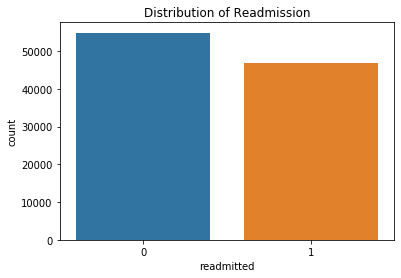

In [65]:
# Distribution of Readmission 
sns.countplot(df['readmitted']).set_title('Distribution of Readmission')

Text(0.5, 1.0, 'Distribution of Comorbidity(0- no diseases, 1- only Diabetic, 2- only circulatory, 3 - both)')

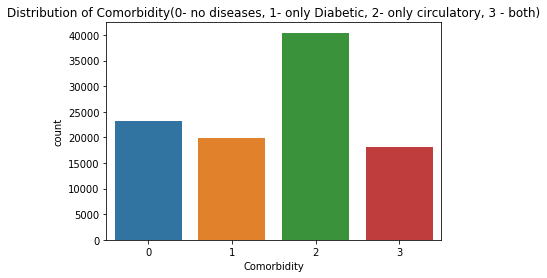

In [66]:
# Distribution of Readmission 
sns.countplot(df['Comorbidity']).set_title('Distribution of Comorbidity(0- no diseases, 1- only Diabetic, 2- only circulatory, 3 - both)')

Text(0.5, 1.0, 'Change in Medication')

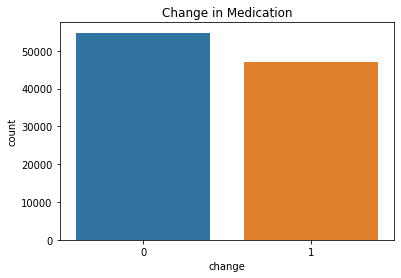

In [67]:
# Distribution of Readmission 
sns.countplot(df['change']).set_title('Change in Medication')

Text(0.5, 1.0, 'Age vs Readmitted')

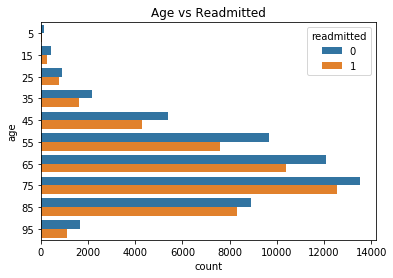

In [68]:
# Distribution of Age 
sns.countplot(y = df['age'], hue=df['readmitted']).set_title('Age vs Readmitted')

Text(0.5, 1.0, 'Admission Type ID vs Readmitted')

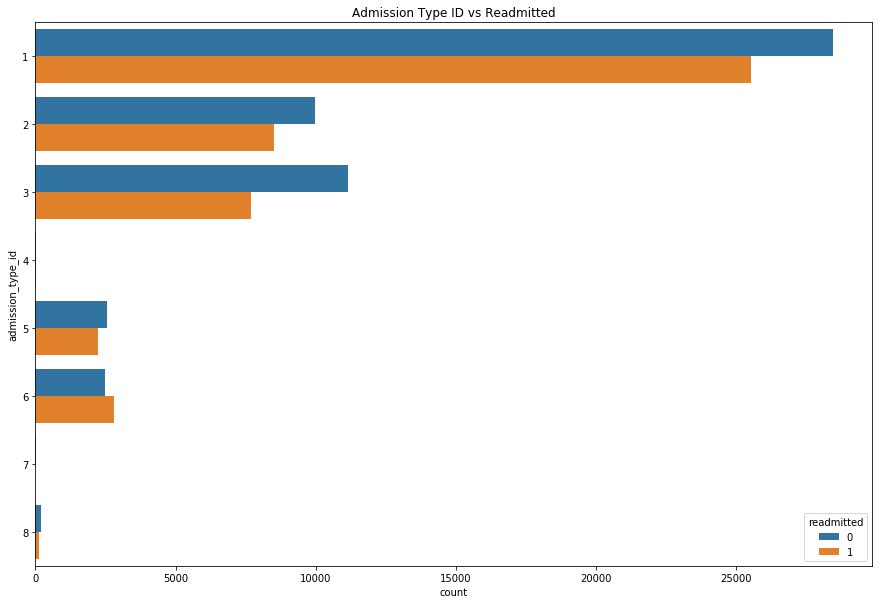

In [69]:
# Distribution of admission_type_id 
fig = plt.figure(figsize=(15,10))
sns.countplot(y = df['admission_type_id'], hue=df['readmitted']).set_title('Admission Type ID vs Readmitted')

# readmitted 1 = yes and 0 = no 

Text(0.5, 1.0, 'discharge disposition id vs Readmitted')

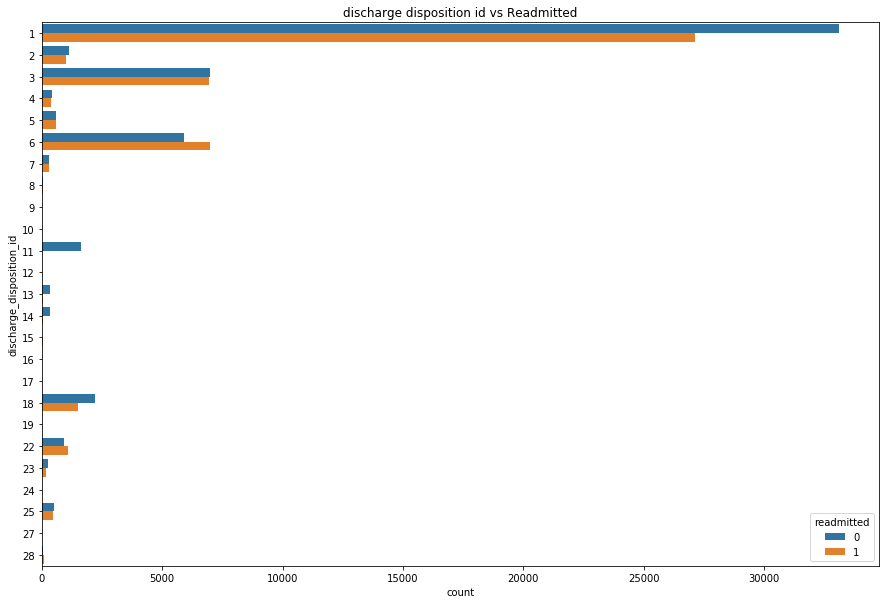

In [70]:
# Distribution of admission_type_id 
fig = plt.figure(figsize=(15,10))
sns.countplot(y = df['discharge_disposition_id'], hue=df['readmitted']).set_title('discharge disposition id vs Readmitted')

# readmitted 1 = yes and 0 = no 

Text(0.5, 1.0, 'discharge disposition id vs Readmitted')

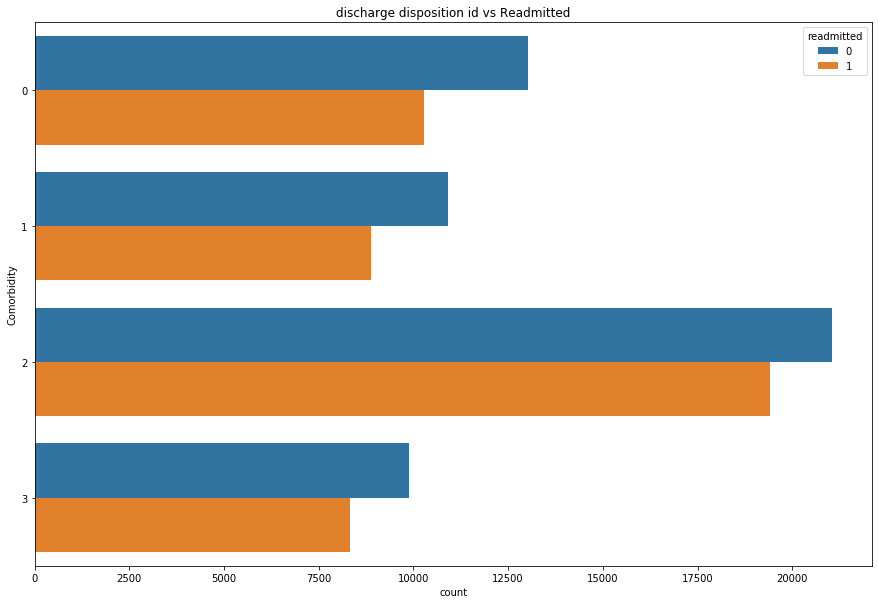

In [71]:
# Distribution of admission_type_id 
fig = plt.figure(figsize=(15,10))
sns.countplot(y = df['Comorbidity'], hue=df['readmitted']).set_title('discharge disposition id vs Readmitted')

# readmitted 1 = yes and 0 = no 

Text(0.5, 1.0, 'Time in Hospital VS. Readmitted')

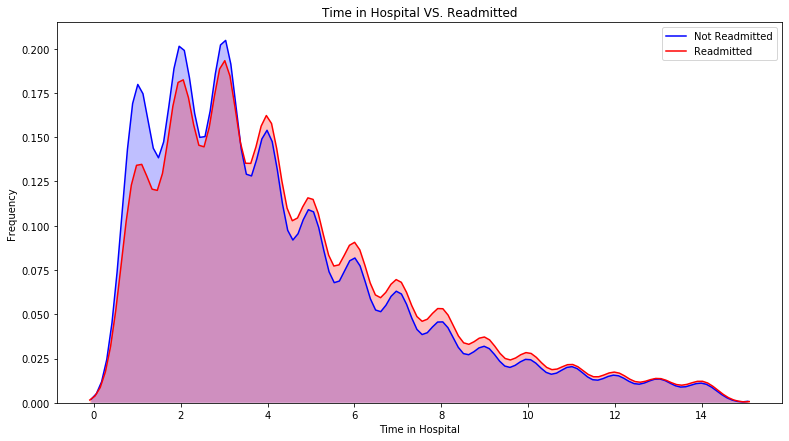

In [72]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmitted')

Text(0.5, 1.0, 'No. Lab Procedures vs Readmitted')

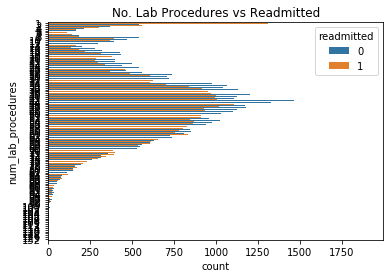

In [73]:
# Distribution of num_lab_procedures 
sns.countplot(y = df['num_lab_procedures'], hue=df['readmitted']).set_title('No. Lab Procedures vs Readmitted')

In [74]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,acetohexamide,tolbutamide,troglitazone,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Comorbidity,isA1CTestTaken,ismax_glu_serumTaken,isA1CTestResultNorm,ismax_glu_serumResultNorm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up
0,8222157,5,0,5,6,25,1,1,17,41,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
1,55629189,5,0,15,1,1,7,3,17,59,0,18,0,0,0,9,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
2,86047875,4,0,25,1,1,7,2,17,11,5,13,2,0,1,6,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
3,82442376,5,1,35,1,1,7,2,17,44,1,16,0,0,0,7,0,0,0,0,0,0,0,1,1,0,3,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
4,42519267,5,1,45,1,1,7,1,17,51,0,8,0,0,0,5,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0


In [75]:
df.shape

(101761, 72)

### PCA

In [77]:
# creating copy of the final df dataframe
df_PCA = df.copy()

# removing the columns not required for modeling
df_PCA.drop(['patient_nbr'], axis=1, inplace=True)

In [78]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = df_PCA.drop(['readmitted'], axis=1)

#putting response variables in Y
y = df_PCA['readmitted']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [79]:
X_train.shape

(71232, 70)

In [80]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [81]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)

# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

In [82]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, readmitted event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 32882
Before OverSampling, counts of label '0': 38350 

Before OverSampling, readmitted event rate : 46.16% 



### The Data is imbalance. if the model is build using such data the moel wil be biased. To handle such imbalance in data we ill be using SMOTE

In [83]:
# conda install -c conda-forge imbalanced-learn

In [84]:
#conda install scikit-learn

In [85]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [86]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, readmission event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (76700, 70)
After OverSampling, the shape of train_y: (76700,) 

After OverSampling, counts of label '1': 38350
After OverSampling, counts of label '0': 38350
After OverSampling, readmission event rate : 50.0% 



Now the data is balanced 
There is one another major problem observed i.e. the number of features available is high we can bulid model using such large number of features we will be using PCA for dimentionality reduction 


In [87]:
#Importing the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [88]:
#Doing the PCA on the train data

pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [89]:
pca.explained_variance_ratio_[:50]

array([1.78399913e-01, 1.09305826e-01, 7.94184706e-02, 7.37055574e-02,
       6.89435090e-02, 6.53998638e-02, 5.26685344e-02, 4.12993320e-02,
       3.78917562e-02, 3.55481289e-02, 2.88623316e-02, 2.80922542e-02,
       2.66490071e-02, 2.44925200e-02, 1.72262575e-02, 1.55622446e-02,
       1.16622998e-02, 1.06544939e-02, 9.34603308e-03, 8.97616530e-03,
       7.87531205e-03, 6.76998157e-03, 6.55801198e-03, 6.31055175e-03,
       5.05694855e-03, 4.84853280e-03, 4.74796146e-03, 4.10027114e-03,
       3.96951697e-03, 3.90125693e-03, 3.77791066e-03, 3.16198093e-03,
       2.82399223e-03, 1.74943023e-03, 1.69466411e-03, 1.55320065e-03,
       1.10848459e-03, 1.09248475e-03, 7.79375162e-04, 5.60093951e-04,
       5.29013912e-04, 4.93988724e-04, 4.91188924e-04, 4.28362743e-04,
       2.73499876e-04, 2.16404911e-04, 1.75316503e-04, 1.31394655e-04,
       1.21310791e-04, 1.15453219e-04])

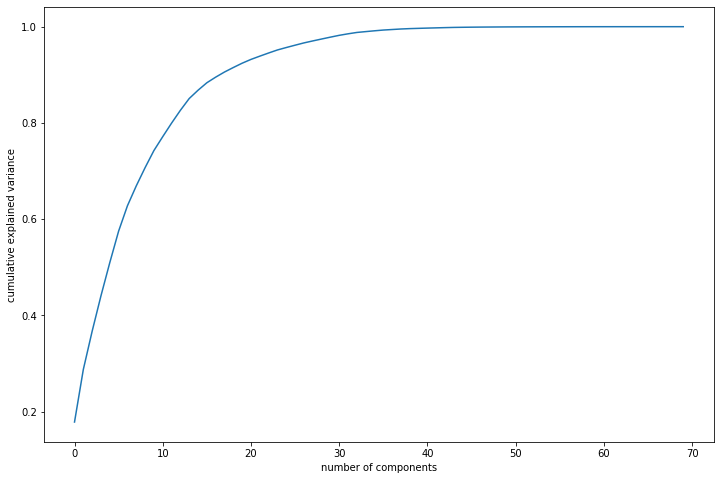

In [90]:
#Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [91]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=35)

In [92]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(76700, 35)

In [93]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0012336429160423323 , min corr:  -0.007389128243473574


In [94]:

#Applying selected components to the test data - 50 components

X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(30529, 35)

#### After PCA we are left with 35 features 
#### Now we will be using this dataframe for further Model buliding and determining wich are te best predictors
#### We will build following models 
##### 1. Logistic Regression 
##### 2. Decision Tree

### Logistic Regresion 
#### Applying Logistic regression on components

In [95]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [96]:
def getModelMetrics(actual_readm=False,pred_readm=False):

    confusion = metrics.confusion_matrix(actual_readm, pred_readm)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_readm,pred_readm)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting readmission when patient doesnot have readmission
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_readm, pred_readm )))

In [97]:
def predictreadmWithProb(model,X,y,prob):
    # Funtion to predict the readmission using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'readm':y, 'readm_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if readm_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.readm_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.readm,y_df.final_predicted)
    return y_df

In [98]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [99]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as readmission/non-readmission
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.readm_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.readm, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [100]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [101]:
modelfit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.5762
Recall/Sensitivity : 0.5974
AUC Score (Train): 0.606345
CV Score : Mean - 0.6049782 | Std - 0.005719366 | Min - 0.5963519 | Max - 0.6141253


In [102]:
# predictions on Test data

pred_probs_test = lr0.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.5746407203298698
Sensitivity/Recall : 0.5940085592011413
Specificity: 0.5552728814585983
False Positive Rate: 0.4447271185414017
Positive predictive value: 0.5314613911933631
Negative Predictive value: 0.6169324988222626
sklearn precision score value: 0.5314613911933631


In [103]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.5730616790592551
Recall : 0.5940085592011413
Precision : 0.5314613911933631


In [104]:
#Making prediction on the test data

pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.61


In [105]:
cut_off_prob=0.5
y_train_df = predictreadmWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.5761799217731421
Sensitivity/Recall : 0.5973663624511082
Specificity: 0.554993481095176
False Positive Rate: 0.445006518904824
Positive predictive value: 0.5730831769856161
Negative Predictive value: 0.5795507147719537
sklearn precision score value: 0.5730831769856161


,readm,readm_Prob,final_predicted
0,1,0.559585,1
1,1,0.451194,0
2,1,0.526485,1
3,0,0.370032,0
4,1,0.530835,1


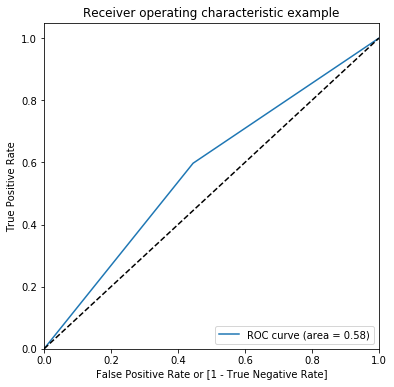

(array([0.        , 0.44500652, 1.        ]),
 array([0.        , 0.59736636, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [106]:
draw_roc(y_train_df.readm, y_train_df.final_predicted)

In [107]:
#draw_roc(y_pred_final.readm, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.readm, y_train_df.final_predicted)))

roc_auc_score : 0.58


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500000  1.000000  0.000000
0.2   0.2  0.500156  0.999922  0.000391
0.3   0.3  0.509557  0.990222  0.028892
0.4   0.4  0.550000  0.892777  0.207223
0.5   0.5  0.576180  0.597366  0.554993
0.6   0.6  0.537927  0.187249  0.888605
0.7   0.7  0.501877  0.007823  0.995932
0.8   0.8  0.500026  0.000052  1.000000
0.9   0.9  0.500000  0.000000  1.000000


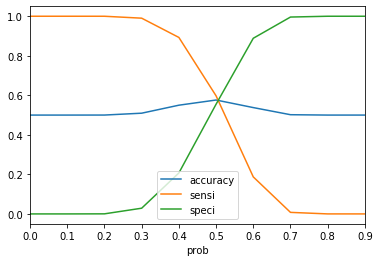

In [108]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

In [109]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.5
predictreadmWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.5761799217731421
Sensitivity/Recall : 0.5973663624511082
Specificity: 0.554993481095176
False Positive Rate: 0.445006518904824
Positive predictive value: 0.5730831769856161
Negative Predictive value: 0.5795507147719537
sklearn precision score value: 0.5730831769856161


,readm,readm_Prob,final_predicted
0,1,0.559585,1
1,1,0.451194,0
2,1,0.526485,1
3,0,0.370032,0
4,1,0.530835,1
5,1,0.567287,1
6,1,0.600934,1
7,1,0.690457,1
8,0,0.460422,0
9,1,0.596893,1


In [110]:
# predicting with the choosen cut-off on test
predictreadmWithProb(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.5746407203298698
Sensitivity/Recall : 0.5940085592011413
Specificity: 0.5552728814585983
False Positive Rate: 0.4447271185414017
Positive predictive value: 0.5314613911933631
Negative Predictive value: 0.6169324988222626
sklearn precision score value: 0.5314613911933631


,readm,readm_Prob,final_predicted
76964,1,0.698673,1
62737,1,0.628444,1
87448,1,0.463268,0
74207,0,0.716474,1
18230,0,0.573066,1
80147,0,0.434680,0
31721,0,0.337574,0
65818,1,0.555450,1
94950,0,0.551893,1
89817,0,0.619803,1


### Decision Tree

In [111]:
# Applying Decision Tree Classifier on Principal components

In [112]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.5734
Recall/Sensitivity : 0.6087
AUC Score (Train): 0.599981
CV Score : Mean - 0.5780114 | Std - 0.01045877 | Min - 0.5699991 | Max - 0.597387


In [113]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_readm=y_test,pred_readm=pred_probs_test)

Roc_auc_score : 0.5577728967962747
Sensitivity/Recall : 0.5900142653352354
Specificity: 0.5255315282573142
False Positive Rate: 0.4744684717426858
Positive predictive value: 0.513629307668426
Negative Predictive value: 0.6014975041597338
sklearn precision score value: 0.513629307668426


In [114]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [115]:

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   59.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:  3.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=10,
                                              splitter='best'),
             iid='warn', n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         '

In [116]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.5674894599945485 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 200, 'min_samples_split': 100}


In [117]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=8,
                             min_samples_leaf=200, 
                             min_samples_split=100,
                             max_features=10,
                             random_state=10)

In [118]:
modelfit(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.5897
Recall/Sensitivity : 0.6627
AUC Score (Train): 0.624314
CV Score : Mean - 0.5898414 | Std - 0.006571792 | Min - 0.5839175 | Max - 0.6024197


In [119]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_readm=y_test,pred_readm=pred_probs_test)

Roc_auc_score : 0.5638959564613915
Sensitivity/Recall : 0.6370898716119828
Specificity: 0.4907020413108002
False Positive Rate: 0.5092979586891998
Positive predictive value: 0.5151095732410611
Negative Predictive value: 0.6142239745242247
sklearn precision score value: 0.5151095732410611


In [120]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.61      0.49      0.55     16509
           1       0.52      0.64      0.57     14020

    accuracy                           0.56     30529
   macro avg       0.56      0.56      0.56     30529
weighted avg       0.57      0.56      0.56     30529



In [121]:

# predicting readmission with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictreadmWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.5897392438070403
Sensitivity/Recall : 0.6627379400260757
Specificity: 0.5167405475880053
False Positive Rate: 0.4832594524119948
Positive predictive value: 0.5783066736444515
Negative Predictive value: 0.6050807608927972
sklearn precision score value: 0.5783066736444515


,readm,readm_Prob,final_predicted
0,1,0.545657,1
1,1,0.391642,0
2,1,0.609202,1
3,0,0.548495,1
4,1,0.597746,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500000  1.000000  0.000000
0.2   0.2  0.501904  0.999296  0.004511
0.3   0.3  0.535215  0.959244  0.111186
0.4   0.4  0.570704  0.861069  0.280339
0.5   0.5  0.589739  0.662738  0.516741
0.6   0.6  0.549335  0.215984  0.882686
0.7   0.7  0.500000  0.000000  1.000000
0.8   0.8  0.500000  0.000000  1.000000
0.9   0.9  0.500000  0.000000  1.000000


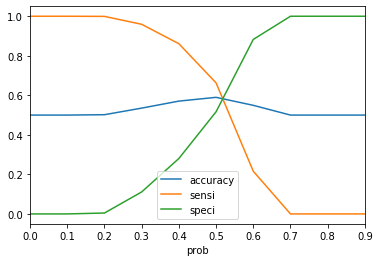

In [122]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [129]:
# predicting readmission with cut-off 0.4
cut_off_prob=0.4
y_train_df = predictreadmWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.5707040417209909
Sensitivity/Recall : 0.8610691003911343
Specificity: 0.2803389830508475
False Positive Rate: 0.7196610169491525
Positive predictive value: 0.544728724369443
Negative Predictive value: 0.6686361092107718
sklearn precision score value: 0.544728724369443


,readm,readm_Prob,final_predicted
0,1,0.545657,1
1,1,0.391642,0
2,1,0.609202,1
3,0,0.548495,1
4,1,0.597746,1


In [124]:

#Lets see how it performs on test data.
y_test_df= predictreadmWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.5499088315550701
Sensitivity/Recall : 0.8384450784593438
Specificity: 0.26137258465079655
False Positive Rate: 0.7386274153492035
Positive predictive value: 0.4908346903837321
Negative Predictive value: 0.6557750759878419
sklearn precision score value: 0.4908346903837321


,readm,readm_Prob,final_predicted
76964,1,0.649017,1
62737,1,0.545657,1
87448,1,0.504739,1
74207,0,0.488506,1
18230,0,0.533875,1


### Logistic Regression ( cut-off = 0.5)		
#### TRAIN
##### Roc_auc_score : 57.61%
##### Sensitivity/Recall : 59.73%
##### Specificity: 55.49%
##### False Positive Rate: 44.50%
##### Positive predictive value: 57.30%
##### Negative Predictive value: 57.95%
##### sklearn precision score value: 57.30%

#### TEST
##### Roc_auc_score : 57.46%
##### Sensitivity/Recall : 59.40%
##### Specificity: 55.52%
##### False Positive Rate: 44.47%
##### Positive predictive value: 53.14%
##### Negative Predictive value: 61.69%
##### sklearn precision score value: 53.14%


### DecisionTree ( cut-off = 0.5)		
#### TRAIN
##### Roc_auc_score : 58.97%
##### Sensitivity/Recall : 66.27%
##### Specificity: 51.67%
##### False Positive Rate: 48.32%
##### Positive predictive value: 57.83%
##### Negative Predictive value: 60.50%
##### sklearn precision score value: 57.83%

#### TEST
##### Roc_auc_score : 54.99%
##### Sensitivity/Recall : 83.84%
##### Specificity: 26.13%
##### False Positive Rate: 73.86%
##### Positive predictive value: 49.08%
##### Negative Predictive value: 65.57%
##### sklearn precision score value: 49.08%